In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# 2. Đọc file dữ liệu chứng khoán JPY và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPYUSDX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.008885,0.008972,0.008861,0.008884,0.008884,0.0
1,2017-12-04,0.008862,0.008876,0.008844,0.008860,0.008860,0.0
2,2017-12-05,0.008888,0.008899,0.008861,0.008889,0.008889,0.0
3,2017-12-06,0.008891,0.008928,0.008887,0.008892,0.008892,0.0
4,2017-12-07,0.008903,0.008903,0.008866,0.008905,0.008905,0.0
...,...,...,...,...,...,...,...
1436,2023-06-05,0.007132,0.007181,0.007120,0.007132,0.007132,0.0
1437,2023-06-06,0.007174,0.007188,0.007145,0.007174,0.007174,0.0
1438,2023-06-07,0.007167,0.007192,0.007142,0.007167,0.007167,0.0
1439,2023-06-08,0.007148,0.007203,0.007138,0.007148,0.007148,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.0
mean,0.008763,0.008790,0.008737,0.008763,0.008763,0.0
std,0.000769,0.000765,0.000774,0.000769,0.000769,0.0
min,0.006659,0.006686,0.006582,0.006659,0.006659,0.0
25%,0.008699,0.008716,0.008676,0.008699,0.008699,0.0
50%,0.009067,0.009092,0.009047,0.009066,0.009066,0.0
75%,0.009257,0.009279,0.009229,0.009257,0.009257,0.0
max,0.009737,0.009873,0.009692,0.009739,0.009739,0.0


In [5]:
df1=df[['Date','Close']]
df1

,Date,Close
0,2017-12-01,0.008884
1,2017-12-04,0.008860
2,2017-12-05,0.008889
3,2017-12-06,0.008892
4,2017-12-07,0.008905
...,...,...
1436,2023-06-05,0.007132
1437,2023-06-06,0.007174
1438,2023-06-07,0.007167
1439,2023-06-08,0.007148


In [6]:
df1=df1.set_index('Date')
df1

,Close
Date,
2017-12-01,0.008884
2017-12-04,0.008860
2017-12-05,0.008889
2017-12-06,0.008892
2017-12-07,0.008905
...,...
2023-06-05,0.007132
2023-06-06,0.007174
2023-06-07,0.007167


In [7]:
df1.index=pd.to_datetime(df1.index)
df1

,Close
Date,
2017-12-01,0.008884
2017-12-04,0.008860
2017-12-05,0.008889
2017-12-06,0.008892
2017-12-07,0.008905
...,...
2023-06-05,0.007132
2023-06-06,0.007174
2023-06-07,0.007167


In [8]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

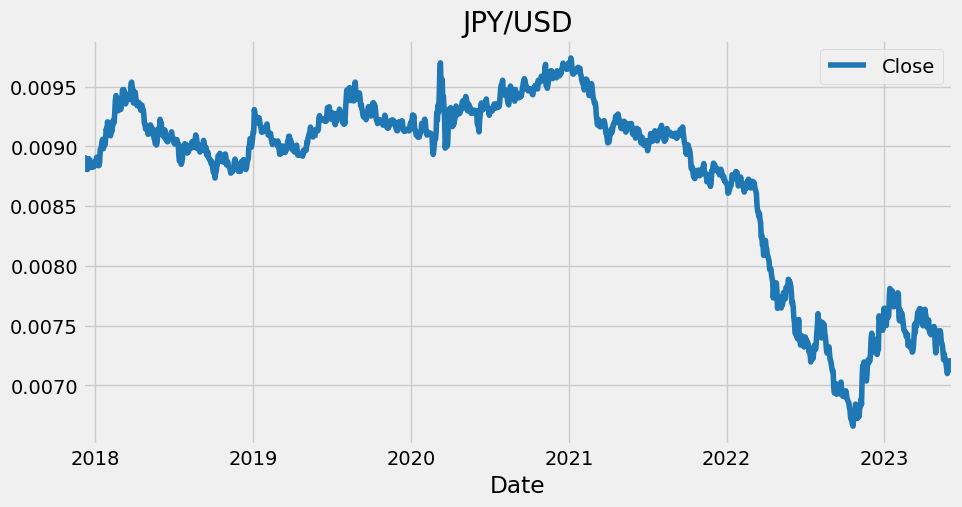

In [9]:
df1.plot(style='-',
        figsize=(10, 5),
        color=color_pal[0],
        title='JPY/USD')
plt.show()

In [10]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [11]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [13]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.00947225 0.00947255 0.00947284 0.00947314 0.00947344 0.00947373
 0.00947403 0.00947432 0.00947462 0.00947491 0.00947521 0.0094755
 0.0094758  0.00947609 0.00947639 0.00947668 0.00947698 0.00947727
 0.00947757 0.00947786 0.00947816 0.00947845 0.00947875 0.00947904
 0.00947934 0.00947963 0.00947993 0.00948022 0.00948052 0.00948081]


In [15]:
# Chia train test lại
train_data1 = df[:train_size]
test_data1 = df[train_size:train_size+test_size]
val_data1 = df[train_size+test_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [20]:
# 7. Đánh giá độ chính xác validate, test
##RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
##MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

##MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 0.002013053289260422
Testing RMSE: 0.0016543075653167572
Validation MAPE: 26.99893224932652
Testing MAPE: 19.641071380365524
Validation MAE: 0.002004858637149857
Testing MAE: 0.0014729579141133


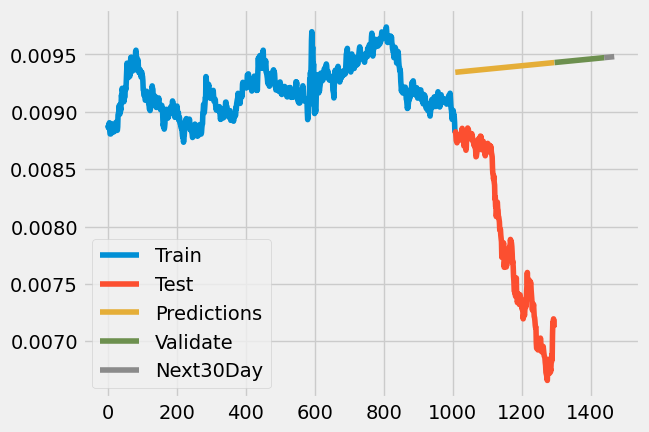

In [17]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [18]:
test_data.index

RangeIndex(start=1007, stop=1295, step=1)